In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
df.shape

(148, 6)

In [5]:
# statistical analysis
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [16]:
print(df.Company.unique()), len(df.Company.unique())


['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']


(None, 7)

In [17]:
print(df.Age.unique()), len(df.Age.unique())

[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]


(None, 30)

In [11]:

print(df.Place.unique()), len(df.Place.unique())

(array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 12)

In [13]:
print(df.Country.unique()), len(df.Country.unique())

['India']


(None, 1)

In [20]:
print(df.Gender.unique()), len(df.Gender.unique())

[0 1]


(None, 2)

In [70]:
#data cleaning
df['Age'] = df['Age'].replace(0, np.nan)
df['Company'] = df['Company'].replace('Tata Consultancy Services','TCS')
df['Company'] = df['Company'].replace('Congnizant','CTS')
df['Company'] = df['Company'].replace('Infosys Pvt Lmt','Infosys')
df.fillna(df.mean(), inplace=True)
df.drop_duplicates(inplace=True)
outliers = df[(np.abs(zscore(df[['Age', 'Salary']])) > 10).any(axis=1)]


<ipython-input-70-c509734e8dfe>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [25]:
df.shape

(144, 6)

     Company   Age  Salary      Place Country  Gender  Company_LabelEncoded
21   Infosys  50.0  3184.0      Delhi   India       0                     2
32   Infosys  45.0  4034.0   Calcutta   India       0                     2
39   Infosys  41.0  3000.0     Mumbai   India       0                     2
50   Infosys  41.0  3000.0    Chennai   India       0                     2
57   Infosys  51.0  3184.0  Hyderabad   India       0                     2
68   Infosys  43.0  4034.0     Mumbai   India       0                     2
75   Infosys  44.0  3000.0     Cochin   India       0                     2
86   Infosys  41.0  3000.0      Delhi   India       0                     2
93   Infosys  54.0  3184.0     Mumbai   India       0                     2
104  Infosys  44.0  4034.0      Delhi   India       0                     2
122  Infosys  44.0  3234.0     Mumbai   India       0                     2
129  Infosys  50.0  3184.0   Calcutta   India       0                     2
138      CTS

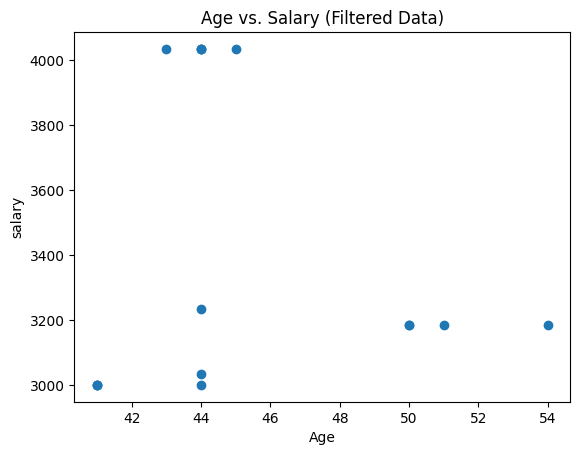

In [71]:
#data analysis
filter_data=df[(df['Age']>40) & (df['Salary']<5000)]
print(filter_data)
plt.scatter(filter_data['Age'], filter_data['Salary'])
plt.xlabel('Age')
plt.ylabel("salary")
plt.title('Age vs. Salary (Filtered Data)')
plt.show()

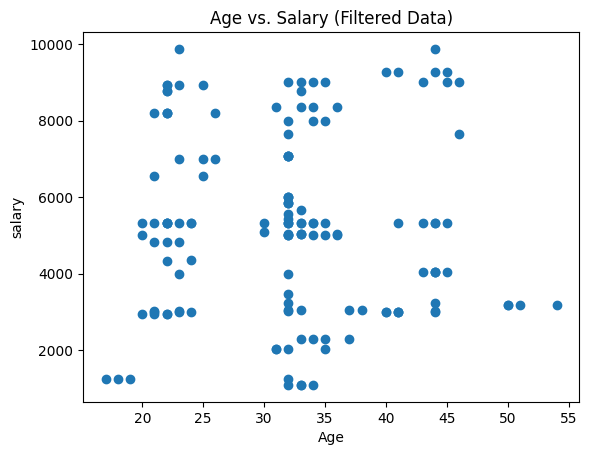

In [72]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel("salary")
plt.title('Age vs. Salary (Filtered Data)')
plt.show()

In [39]:
count_of_place=df['Place'].value_counts()
print(count_of_place)

Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64


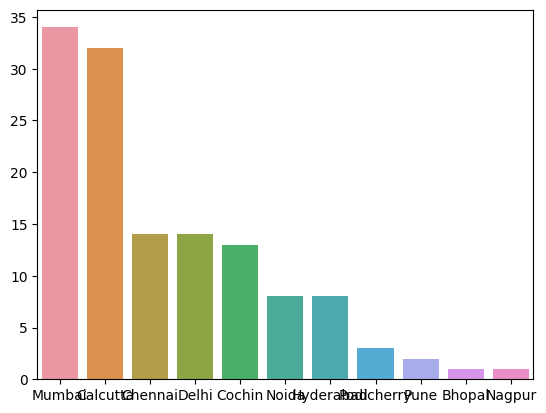

<Figure size 1500x500 with 0 Axes>

In [73]:
sns.barplot(x=count_of_place.index,y=count_of_place.values)
plt.figure(figsize=(15,5))
plt.show()

In [77]:
dummies = pd.get_dummies(df.Company)
encoded_company = pd.concat([df,dummies],axis='columns')
encoded_company.head()


,Company,Age,Salary,Place,Country,Gender,Company_LabelEncoded,place_encoder,CTS,Infosys,TCS
0,TCS,20.0,5312.467742,Chennai,India,0,2,2,0,0,1
1,Infosys,30.0,5312.467742,Mumbai,India,0,1,6,0,1,0
2,TCS,35.0,2300.000000,Calcutta,India,0,2,1,0,0,1
3,Infosys,40.0,3000.000000,Delhi,India,0,1,4,0,1,0
4,TCS,23.0,4000.000000,Mumbai,India,0,2,6,0,0,1


In [78]:

place_dummies = pd.get_dummies(encoded_company.Place)
place_dummies
encoded_place = pd.concat([encoded_company,place_dummies],axis='columns')
encoded_place.head()

,Company,Age,Salary,Place,Country,Gender,Company_LabelEncoded,place_encoder,CTS,Infosys,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,TCS,20.0,5312.467742,Chennai,India,0,2,2,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Infosys,30.0,5312.467742,Mumbai,India,0,1,6,0,1,...,0,0,0,0,0,1,0,0,0,0
2,TCS,35.0,2300.000000,Calcutta,India,0,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Infosys,40.0,3000.000000,Delhi,India,0,1,4,0,1,...,0,0,0,1,0,0,0,0,0,0
4,TCS,23.0,4000.000000,Mumbai,India,0,2,6,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
label_encoder = LabelEncoder()
df['Company_LabelEncoded'] = label_encoder.fit_transform(df['Company'])
df['place_encoder']=label_encoder.fit_transform(df['Place'])

print(df)

     Company   Age       Salary     Place Country  Gender  \
0        TCS  20.0  5312.467742   Chennai   India       0   
1    Infosys  30.0  5312.467742    Mumbai   India       0   
2        TCS  35.0  2300.000000  Calcutta   India       0   
3    Infosys  40.0  3000.000000     Delhi   India       0   
4        TCS  23.0  4000.000000    Mumbai   India       0   
..       ...   ...          ...       ...     ...     ...   
142  Infosys  22.0  8202.000000    Mumbai   India       0   
143      TCS  33.0  9024.000000  Calcutta   India       1   
145  Infosys  44.0  4034.000000     Delhi   India       1   
146      TCS  33.0  5034.000000    Mumbai   India       1   
147  Infosys  22.0  8202.000000    Cochin   India       0   

     Company_LabelEncoded  place_encoder  
0                       2              2  
1                       1              6  
2                       2              1  
3                       1              4  
4                       2              6  
..       

In [81]:
#scaling
scaler = MinMaxScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
df.head()

,Company,Age,Salary,Place,Country,Gender,Company_LabelEncoded,place_encoder
0,TCS,0.081081,0.480650,Chennai,India,0,2,2
1,Infosys,0.351351,0.480650,Mumbai,India,0,1,6
2,TCS,0.486486,0.137817,Calcutta,India,0,2,1
3,Infosys,0.621622,0.217480,Delhi,India,0,1,4
4,TCS,0.162162,0.331285,Mumbai,India,0,2,6
